Further Neural Network Analysis (MultiLablel and for individual medicines)

In [201]:
import pandas as pd
import numpy as np 
from numpy import mean
from numpy import std
from sklearn.datasets import make_multilabel_classification
from sklearn.model_selection import RepeatedKFold
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
pd.options.display.max_rows=None
pd.options.display.max_columns=None
from sklearn.metrics import accuracy_score

In [202]:
df1=pd.read_csv("random_imputed.csv",index_col=[0])
df1_other=pd.read_csv("random_imputed.csv",index_col=[0])
df2=pd.read_csv("Raw_NaN.csv",index_col=[0])
df3=pd.read_csv("drug_onehot_latest.csv",index_col=[0])

In [203]:
df3.head()

,sulfotanshinone sodium injection,Furosemide tablet,Meglumine Adenosine Cyclophosphate for injection,Furosemide injection,Milrinone injection,Deslanoside injection,Torasemide tablet,Benazepril hydrochloride tablet,Atorvastatin calcium tablet,Digoxin tablet,Hydrochlorothiazide tablet,Spironolactone tablet,Valsartan Dispersible tablet,Dobutamine hydrochloride injection,Isoprenaline Hydrochloride injection,Nitroglycerin injection,Shenfu injection,Isosorbide Mononitrate Sustained Release tablet
inpatient.number,,,,,,,,,,,,,,,,,,
722128,0,1,0,1,1,1,0,0,0,1,0,1,0,0,0,0,0,0
723327,0,1,0,1,1,1,1,0,1,1,0,1,1,0,0,0,0,1
723617,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0
724385,0,1,0,1,1,1,0,0,0,1,0,1,0,0,0,0,0,0
725509,0,1,0,1,1,1,1,0,0,1,0,1,0,0,0,0,1,0


In [204]:
from sklearn import preprocessing

In [205]:
df1.drop(['gender','ageCat'],axis=1,inplace=True)

In [206]:
scaler = preprocessing.RobustScaler()
robust_df = scaler.fit_transform(df1)

In [207]:
scaler = preprocessing.StandardScaler()
standard_df = scaler.fit_transform(df1)

In [208]:
scaler = preprocessing.MinMaxScaler()
minmax_df = scaler.fit_transform(df1)

In [209]:
scaler = preprocessing.RobustScaler()
robust_df_other = scaler.fit_transform(df1_other)

In [210]:
scaler = preprocessing.StandardScaler()
standard_df_other = scaler.fit_transform(df1_other)

In [211]:
scaler = preprocessing.MinMaxScaler()
minmax_df_other = scaler.fit_transform(df1_other)

In [212]:
df4=df3['Atorvastatin calcium tablet']
df4 = df4.to_frame()

In [231]:
import math
import random

In [235]:
n = 10
# calculate the range for the weights
std = math.sqrt(2.0 / n)
# generate random numbers
numbers =np.random.randn(1000)
# scale to the desired range
scaled = numbers * std


In [236]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from keras.metrics import binary_accuracy
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers


In [237]:
y = to_categorical(df4)
y = np.vstack((y[:, 0]))

In [314]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(standard_df, y, test_size=0.2)

In [315]:
import random
random.seed(42)

In [320]:
clf = Sequential()
clf.add(Dense(8, activation='relu', input_dim=df1.shape[1]))
##clf.add(Dense(2,activation="relu"))
clf.add(Dense(1, activation='sigmoid'))
clf.compile(loss='binary_crossentropy', optimizer="rmsprop", metrics=["accuracy"])
clf.fit(X_train, y_train,validation_data=(X_test,y_test),epochs=20,batch_size=32,verbose=1)

Epoch 1/20
51/51 [==============================] - 4s 26ms/step - loss: 0.7199 - accuracy: 0.5474 - val_loss: 0.6761 - val_accuracy: 0.6185
Epoch 2/20
51/51 [==============================] - 0s 9ms/step - loss: 0.6733 - accuracy: 0.5880 - val_loss: 0.6611 - val_accuracy: 0.6185
Epoch 3/20
51/51 [==============================] - 0s 10ms/step - loss: 0.6496 - accuracy: 0.6192 - val_loss: 0.6539 - val_accuracy: 0.6185
Epoch 4/20
51/51 [==============================] - 0s 10ms/step - loss: 0.6327 - accuracy: 0.6323 - val_loss: 0.6516 - val_accuracy: 0.6309
Epoch 5/20
51/51 [==============================] - 0s 9ms/step - loss: 0.6206 - accuracy: 0.6417 - val_loss: 0.6486 - val_accuracy: 0.6384
Epoch 6/20
51/51 [==============================] - 0s 7ms/step - loss: 0.6099 - accuracy: 0.6604 - val_loss: 0.6499 - val_accuracy: 0.6384
Epoch 7/20
51/51 [==============================] - 0s 8ms/step - loss: 0.6009 - accuracy: 0.6673 - val_loss: 0.6529 - val_accuracy: 0.6484
Epoch 8/20
51/51 

In [321]:
clf.evaluate(X_test,y_test)

13/13 [==============================] - 0s 3ms/step - loss: 0.6896 - accuracy: 0.6409


[0.6896159052848816, 0.6408977508544922]

In [322]:
ypred=clf.predict(X_test)

In [323]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)


E:\anoconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
E:\anoconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [324]:
y_pred = classifier.predict(X_test)


In [325]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
 
print ("Confusion Matrix : \n", cm)


Confusion Matrix : 
 [[ 64 103]
 [ 55 179]]


In [326]:
accuracy_score(y_test, y_pred)

0.6059850374064838

In [89]:
# clf = Sequential()
# clf.add(Dense(32, activation='relu', input_dim=df1.shape[1]))
# # clf.add(Dense(64, activation='relu'))
# clf.add(Dense(1, activation='sigmoid'))
# clf.compile(loss='binary_crossentropy', optimizer=SGD(), metrics=["accuracy"])
# clf.fit(X_train, y_train, epochs=60, batch_size=128, verbose=1)

In [49]:
# clf.evaluate(X_test,y_test)

7/7 [==============================] - 1s 2ms/step - loss: 0.7030 - accuracy: 0.5572


[0.7029848098754883, 0.5572139024734497]

In [338]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.95)
pca.fit(minmax_df)
reduced = pca.transform(minmax_df)
reduced.shape

(2003, 51)

# lets try PCA and then train the model 



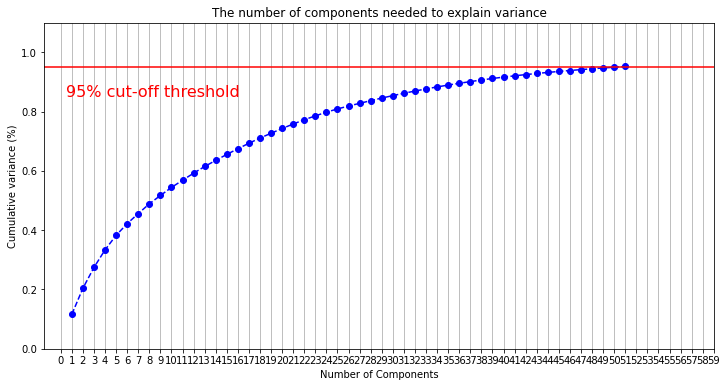

In [340]:
from sklearn.decomposition import PCA

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 52, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 60, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()


In [341]:
 
pca = PCA(n_components = 51)
 
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
 
explained_variance = pca.explained_variance_ratio_


In [345]:
clf = Sequential()
clf.add(Dense(64, activation='relu', input_dim=reduced.shape[1]))
##clf.add(Dense(2,activation="relu"))
clf.add(Dense(1, activation='sigmoid'))
clf.compile(loss='binary_crossentropy', optimizer="rmsprop", metrics=["accuracy"])
clf.fit(X_train, y_train,validation_data=(X_test,y_test),epochs=20,verbose=1)

Epoch 1/20
51/51 [==============================] - 4s 22ms/step - loss: 0.7341 - accuracy: 0.5362 - val_loss: 0.7052 - val_accuracy: 0.5736
Epoch 2/20
51/51 [==============================] - 0s 8ms/step - loss: 0.6537 - accuracy: 0.5911 - val_loss: 0.6824 - val_accuracy: 0.5885
Epoch 3/20
51/51 [==============================] - 0s 8ms/step - loss: 0.6237 - accuracy: 0.6336 - val_loss: 0.6790 - val_accuracy: 0.6010
Epoch 4/20
51/51 [==============================] - 0s 8ms/step - loss: 0.6060 - accuracy: 0.6635 - val_loss: 0.6718 - val_accuracy: 0.6135
Epoch 5/20
51/51 [==============================] - 0s 6ms/step - loss: 0.5934 - accuracy: 0.6854 - val_loss: 0.6733 - val_accuracy: 0.6085
Epoch 6/20
51/51 [==============================] - 0s 7ms/step - loss: 0.5822 - accuracy: 0.6935 - val_loss: 0.6721 - val_accuracy: 0.6160
Epoch 7/20
51/51 [==============================] - 0s 7ms/step - loss: 0.5731 - accuracy: 0.7079 - val_loss: 0.6742 - val_accuracy: 0.6359
Epoch 8/20
51/51 [=